In [9]:
import os
import time
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *

import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.callbacks import *

import warnings
warnings.filterwarnings('ignore')

In [10]:
path = os.getcwd() + "/dataset/"
path

'/root/dataset/'

In [11]:
TRAINING_DIR = path+"/train"
VALIDATION_DIR = path + "/val"
TEST_DIR = path + "/test"

print(TRAINING_DIR)
print(VALIDATION_DIR)
print(TEST_DIR)

/root/dataset//train
/root/dataset//val
/root/dataset//test


In [12]:
def data_loader(path):
    X = []
    Y = []
    for folder in os.listdir(path):
        for file in os.listdir(os.path.join(path, folder)):
            feature = np.load(os.path.join(path, folder, file))
            label = folder
            X.append(feature)
            Y.append(label)
    return X, Y

In [13]:
X_train, Y_train = data_loader(TRAINING_DIR)
X_val, Y_val = data_loader(VALIDATION_DIR)
X_test, Y_test = data_loader(TEST_DIR)

In [14]:
print("There are {} training samples and {} training labels".format(len(X_train), len(Y_train)))
print("There are {} validation samples and {} validation labels".format(len(X_val), len(Y_val)))
print("There are {} testing samples and {} testing labels".format(len(X_test), len(Y_test)))

There are 14000 training samples and 14000 training labels
There are 2000 validation samples and 2000 validation labels
There are 4000 testing samples and 4000 testing labels


In [15]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_val = np.array(Y_val)
Y_test = np.array(Y_test)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of X_test: {}".format(X_test.shape))

Shape of X_train: (14000, 64575)
Shape of X_val: (2000, 64575)
Shape of X_test: (4000, 64575)


In [16]:
# Reshape the input data
X_train = X_train.reshape( (X_train.shape[0], X_train.shape[1], 1) )
X_val = X_val.reshape( (X_val.shape[0], X_val.shape[1], 1) )
X_test = X_test.reshape( (X_test.shape[0], X_test.shape[1], 1) )
Y_train = Y_train.reshape( (Y_train.shape[0], 1) )
Y_val = Y_val.reshape( (Y_val.shape[0], 1) )
Y_test = Y_test.reshape( (Y_test.shape[0], 1) )

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of X_test: {}".format(X_test.shape))

Shape of X_train: (14000, 64575, 1)
Shape of X_val: (2000, 64575, 1)
Shape of X_test: (4000, 64575, 1)


In [17]:
# shuffle the dataset
shuffle_index = np.random.permutation(len(X_train))
X_train, Y_train = X_train[shuffle_index], Y_train[shuffle_index]
shuffle_index = np.random.permutation(len(X_val))
X_val, Y_val = X_val[shuffle_index], Y_val[shuffle_index]
shuffle_index = np.random.permutation(len(X_test))
X_test, Y_test = X_test[shuffle_index], Y_test[shuffle_index]

In [18]:
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_val = label_encoder.fit_transform(Y_val)
Y_test = label_encoder.fit_transform(Y_test)

In [19]:
model = Sequential([
    layers.Input(shape=(X_train.shape[1:])),
    layers.Conv1D(16, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(256, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(512, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

2023-06-27 11:17:38.212882: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-27 11:17:38.230295: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-27 11:17:38.230500: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 64573, 16)         64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 32286, 16)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 32284, 32)         1568      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 16142, 32)        0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 16140, 64)         6208      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 8070, 64)         0

In [21]:
earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

In [22]:
epochs = 120
batch_size = 128
current_time = int(time.time())
stop_training_callback = earlystopper
history = model.fit(X_train, Y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_val, Y_val), 
                    callbacks=[stop_training_callback])
print("Training completed in {} seconds.".format(int(time.time()-current_time)))

Epoch 1/120


2023-06-27 11:17:45.060275: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-27 11:17:47.419281: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-27 11:17:48.162307: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f0611b1f310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-27 11:17:48.162341: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-06-27 11:17:48.180362: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-27 11:17:48.406433: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

110/110 [==============================] - 45s 294ms/step - loss: 0.5501 - accuracy: 0.7025 - val_loss: 0.4791 - val_accuracy: 0.7910
Epoch 2/120
110/110 [==============================] - 25s 224ms/step - loss: 0.4278 - accuracy: 0.8041 - val_loss: 0.3858 - val_accuracy: 0.8145
Epoch 3/120
110/110 [==============================] - 25s 228ms/step - loss: 0.3675 - accuracy: 0.8304 - val_loss: 0.3260 - val_accuracy: 0.8490
Epoch 4/120
110/110 [==============================] - 25s 223ms/step - loss: 0.3303 - accuracy: 0.8486 - val_loss: 0.2988 - val_accuracy: 0.8610
Epoch 5/120
110/110 [==============================] - 25s 225ms/step - loss: 0.2910 - accuracy: 0.8665 - val_loss: 0.2677 - val_accuracy: 0.8845
Epoch 6/120
110/110 [==============================] - 24s 223ms/step - loss: 0.2511 - accuracy: 0.8909 - val_loss: 0.2595 - val_accuracy: 0.8905
Epoch 7/120
110/110 [==============================] - 25s 224ms/step - loss: 0.2261 - accuracy: 0.9022 - val_loss: 0.2250 - val_accurac

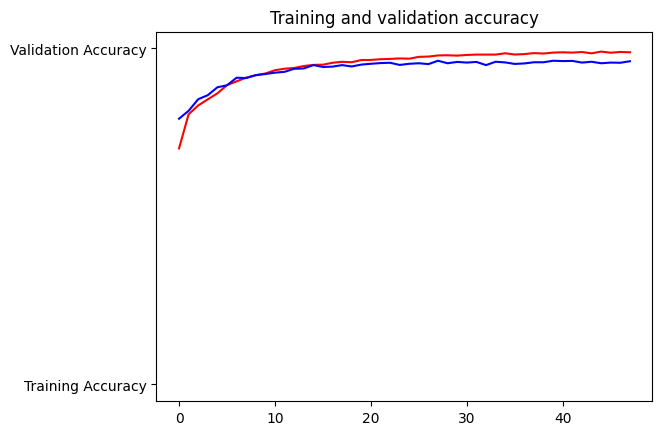

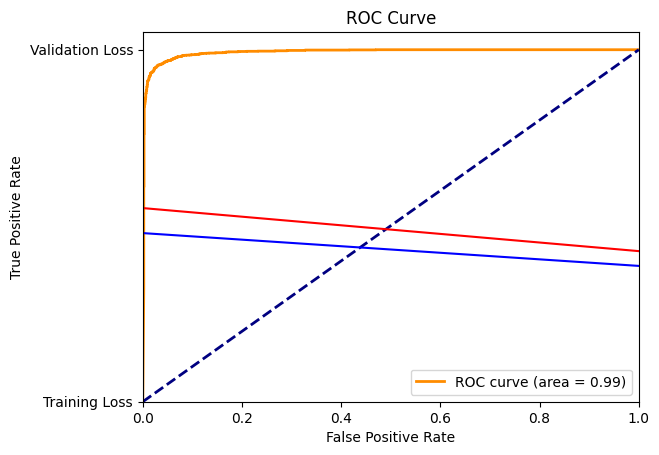

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [34]:
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

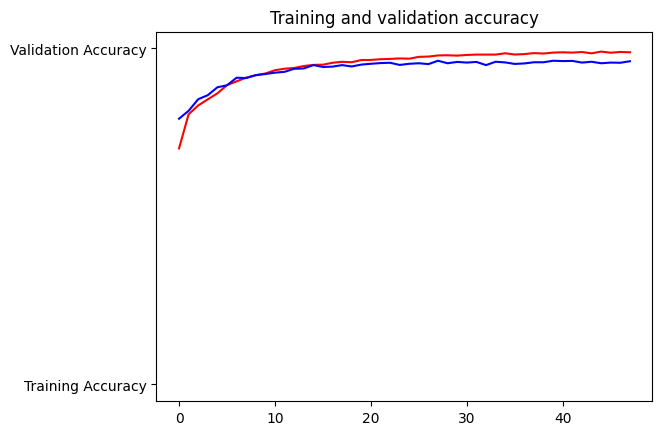

AttributeError: module 'matplotlib' has no attribute 'pyplot'

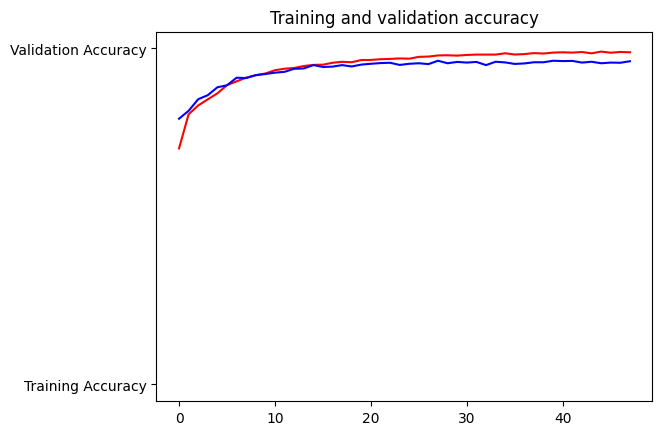

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [32]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [24]:
test_predict = model.predict(X_test)

125/125 [==============================] - 2s 15ms/step


In [25]:
show_test_predict = np.round(test_predict, 0)
show_test_predict = pd.DataFrame(show_test_predict)
print(show_test_predict)
print(len(show_test_predict))

        0
0     1.0
1     0.0
2     0.0
3     1.0
4     1.0
...   ...
3995  0.0
3996  0.0
3997  0.0
3998  1.0
3999  0.0

[4000 rows x 1 columns]
4000


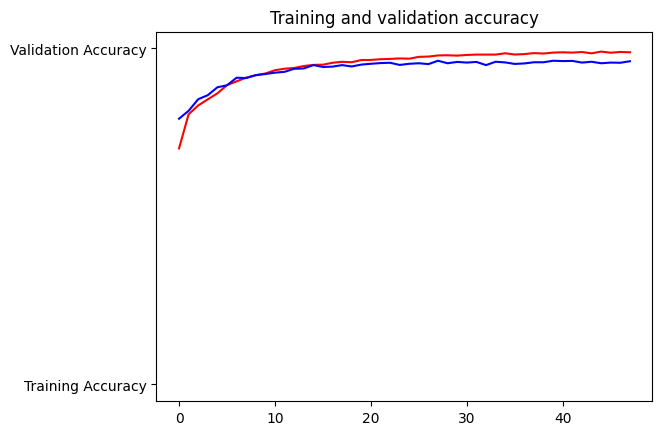

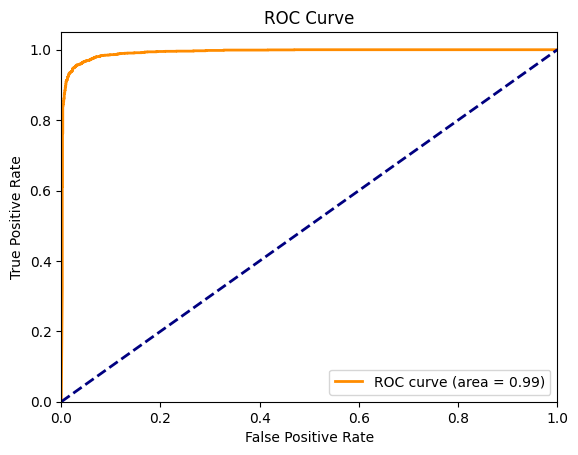

AttributeError: module 'matplotlib' has no attribute 'pyplot'

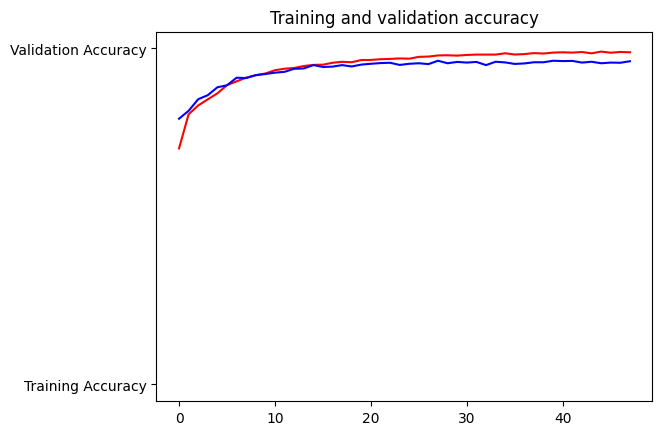

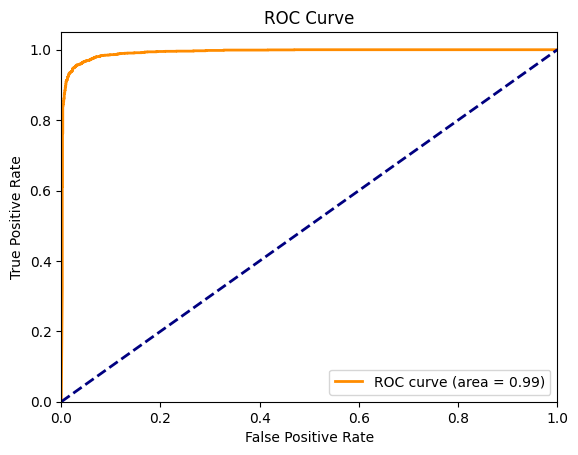

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [33]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, test_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [27]:
from sklearn.metrics import f1_score
f1_score(Y_test, show_test_predict, average='macro')

0.9622487518493581

In [28]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test, show_test_predict)
display(cf)

array([[1936,   64],
       [  87, 1913]])

In [29]:
stt = model.evaluate(X_test, Y_test)
print(stt)

125/125 [==============================] - 2s 16ms/step - loss: 0.1316 - accuracy: 0.9622
[0.1315784454345703, 0.9622499942779541]


In [31]:
print(classification_report(Y_test, show_test_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2000
           1       0.97      0.96      0.96      2000

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000

